In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

## CASMI - NEGATIVE

In [45]:
IDIR_V01a = "logs_triton/version_01a/ds=CASMI__ion=negative/"
IDIR_V03 = "logs_triton/version_03__log_score_fix/ds=CASMI__ion=negative/"

In [21]:
df = pd.concat(
    [
        pd.read_csv(os.path.join(IDIR_V01a, "topk__spl=%03d.tsv" % idx), sep="\t").assign(sample=idx, version="v01a") 
        for idx in range(10)
    ] 
    + 
    [
        pd.read_csv(os.path.join(IDIR_V03, "topk__spl=%03d.tsv" % idx), sep="\t")
            .assign(sample=idx, version="v03")
            .rename(columns={"top_acc_perc__casmi": "top_acc_perc"})
        for idx in range(10)
    ]
    +
    [
        pd.read_csv(os.path.join(IDIR_V03, "topk__baseline__spl=%03d.tsv" % idx), sep="\t")
            .assign(sample=idx, version="baseline")
            .rename(columns={"top_acc_perc__casmi": "top_acc_perc"})
        for idx in range(10)
    ]
)

In [36]:
df[df["k"].isin([1, 5, 10, 20])].drop(["sample", "top_acc_perc__csi"], axis=1).groupby(["k", "version"]).mean()

top_acc_perc
k  version               
1  baseline          10.0
   v01a              16.0
   v03               16.0
5  baseline          43.6
   v01a              44.4
   v03               46.2
10 baseline          54.4
   v01a              56.4
   v03               57.0
20 baseline          68.4
   v01a              69.2
   v03               69.2

Text(0.5, 1.0, 'Normalized Discounted Cumulative Gain (NDCG)')

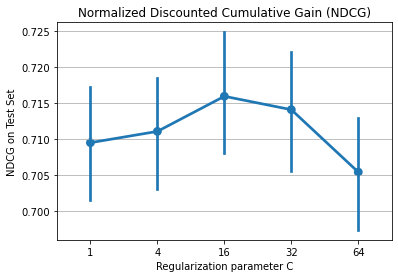

In [46]:
df = pd.concat(
    [
        pd.read_csv(os.path.join(IDIR_V03, "grid_search_results__spl=%03d.tsv" % idx), sep="\t").assign(sample=idx) 
        for idx in range(10)
    ]
)

ax = sns.pointplot(x="C", y="ndcg_ohc", data=df)
ax.grid(axis="y")
ax.set_xlabel("Regularization parameter C")
ax.set_ylabel("NDCG on Test Set")
ax.set_title("Normalized Discounted Cumulative Gain (NDCG)")

## EA - NEGATIVE

In [68]:
IDIR_V01a = "logs_triton/version_01a/ds=EA__ion=negative/"
IDIR_V03 = "logs_triton/version_03__log_score_fix/ds=EA__ion=negative/"

In [38]:
df = pd.concat(
    [
        pd.read_csv(os.path.join(IDIR_V01a, "topk__spl=%03d.tsv" % idx), sep="\t").assign(sample=idx, version="v01a") 
        for idx in range(10)
    ] 
    + 
    [
        pd.read_csv(os.path.join(IDIR_V03, "topk__spl=%03d.tsv" % idx), sep="\t")
            .assign(sample=idx, version="v03")
            .rename(columns={"top_acc_perc__casmi": "top_acc_perc"})
        for idx in range(10)
    ]
    +
    [
        pd.read_csv(os.path.join(IDIR_V03, "topk__baseline__spl=%03d.tsv" % idx), sep="\t")
            .assign(sample=idx, version="baseline")
            .rename(columns={"top_acc_perc__casmi": "top_acc_perc"})
        for idx in range(10)
    ]
)

In [39]:
df[df["k"].isin([1, 5, 10, 20])].drop(["sample", "top_acc_perc__csi"], axis=1).groupby(["k", "version"]).mean()

top_acc_perc
k  version               
1  baseline     20.769231
   v01a         26.153846
   v03          26.461538
5  baseline     56.307692
   v01a         61.538462
   v03          61.230769
10 baseline     67.692308
   v01a         72.307692
   v03          71.076923
20 baseline     76.153846
   v01a         79.846154
   v03          80.923077

<AxesSubplot:xlabel='rt', ylabel='pref_value'>

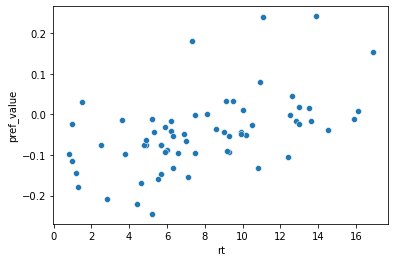

In [77]:
df = pd.read_csv(os.path.join(IDIR_V03, "pref_values__spl=%03d.tsv" % 8), sep="\t")
sns.scatterplot(x="rt", y="pref_value", data=df)

## EA - POSITIVE

In [47]:
IDIR_V01a = "logs_triton/version_01a/ds=EA__ion=positive/"
IDIR_V03 = "logs_triton/version_03__log_score_fix/ds=EA__ion=positive/"

In [41]:
df = pd.concat(
    [
        pd.read_csv(os.path.join(IDIR_V01a, "topk__spl=%03d.tsv" % idx), sep="\t").assign(sample=idx, version="v01a") 
        for idx in range(10)
    ] 
    + 
    [
        pd.read_csv(os.path.join(IDIR_V03, "topk__spl=%03d.tsv" % idx), sep="\t")
            .assign(sample=idx, version="v03")
            .rename(columns={"top_acc_perc__casmi": "top_acc_perc"})
        for idx in range(10)
    ]
    +
    [
        pd.read_csv(os.path.join(IDIR_V03, "topk__baseline__spl=%03d.tsv" % idx), sep="\t")
            .assign(sample=idx, version="baseline")
            .rename(columns={"top_acc_perc__casmi": "top_acc_perc"})
        for idx in range(10)
    ]
)

In [42]:
df[df["k"].isin([1, 5, 10, 20])].drop(["sample", "top_acc_perc__csi"], axis=1).groupby(["k", "version"]).mean()

top_acc_perc
k  version               
1  baseline          23.8
   v01a              26.7
   v03               26.6
5  baseline          61.0
   v01a              62.1
   v03               60.0
10 baseline          71.6
   v01a              72.1
   v03               71.7
20 baseline          80.1
   v01a              81.1
   v03               81.5

<AxesSubplot:xlabel='rt', ylabel='pref_value'>

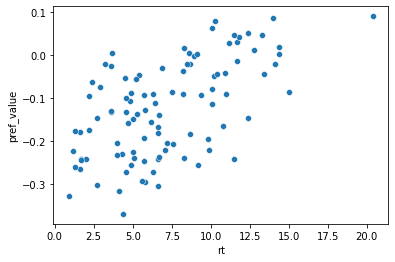

In [67]:
df = pd.read_csv(os.path.join(IDIR_V03, "pref_values__spl=%03d.tsv" % 8), sep="\t")
sns.scatterplot(x="rt", y="pref_value", data=df)

## Retention Order Prediction vs. Top-1 Improvement

<AxesSubplot:xlabel='Order Accuracy', ylabel='Top-1 Improvement'>

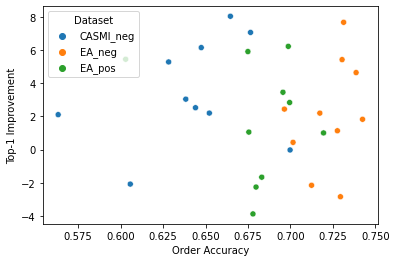

In [103]:
from msmsrt_scorer.lib.cindex_measure import cindex

k = 1

order_acc, top1_improv, col = [], [], []

IDIR_V03 = "logs_triton/version_03__log_score_fix/ds=CASMI__ion=negative/"
for spl in range(10):
    # Read preference values
    _tmp = pd.read_csv(os.path.join(IDIR_V03, "pref_values__spl=%03d.tsv" % spl), sep="\t")
    order_acc.append(cindex(_tmp["rt"], _tmp["pref_value"]))
    
    # Top-k accuracy
    _baseline = pd.read_csv(os.path.join(IDIR_V03, "topk__baseline__spl=%03d.tsv" % spl), sep="\t")
    _msrt = pd.read_csv(os.path.join(IDIR_V03, "topk__spl=%03d.tsv" % spl), sep="\t")
    
    top1_improv.append((_msrt - _baseline)["top_acc_perc__csi"][:k].mean())
    col.append("CASMI_neg")

IDIR_V03 = "logs_triton/version_03__log_score_fix/ds=EA__ion=negative/"
for spl in range(10):
    # Read preference values
    _tmp = pd.read_csv(os.path.join(IDIR_V03, "pref_values__spl=%03d.tsv" % spl), sep="\t")
    order_acc.append(cindex(_tmp["rt"], _tmp["pref_value"]))
    
    # Top-k accuracy
    _baseline = pd.read_csv(os.path.join(IDIR_V03, "topk__baseline__spl=%03d.tsv" % spl), sep="\t")
    _msrt = pd.read_csv(os.path.join(IDIR_V03, "topk__spl=%03d.tsv" % spl), sep="\t")
    
    top1_improv.append((_msrt - _baseline)["top_acc_perc__csi"][:k].mean())
    col.append("EA_neg")
    
IDIR_V03 = "logs_triton/version_03__log_score_fix/ds=EA__ion=positive/"
for spl in range(10):
    # Read preference values
    _tmp = pd.read_csv(os.path.join(IDIR_V03, "pref_values__spl=%03d.tsv" % spl), sep="\t")
    order_acc.append(cindex(_tmp["rt"], _tmp["pref_value"]))
    
    # Top-k accuracy
    _baseline = pd.read_csv(os.path.join(IDIR_V03, "topk__baseline__spl=%03d.tsv" % spl), sep="\t")
    _msrt = pd.read_csv(os.path.join(IDIR_V03, "topk__spl=%03d.tsv" % spl), sep="\t")
    
    top1_improv.append((_msrt - _baseline)["top_acc_perc__csi"][:k].mean())
    col.append("EA_pos")
    
    
sns.scatterplot(data=pd.DataFrame({"Order Accuracy": order_acc, "Top-1 Improvement": top1_improv, "Dataset": col}),
                x="Order Accuracy", y="Top-1 Improvement", hue="Dataset")